In [1]:
from ipynb.fs.full.CovidReceptorExpressionAnalysis_Functions import *

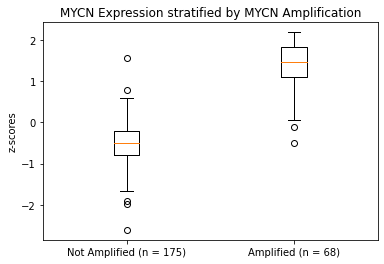

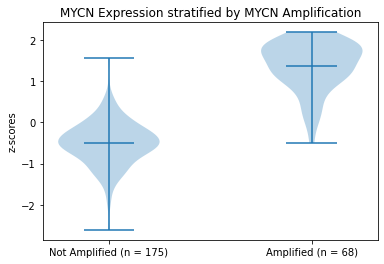

Not Amplified: median = -0.5007, mean = -0.5081485714285715, 95% CI = (-0.5877260573894861, -0.4285710854676569)
Amplified: median = 1.4717500000000001, mean = 1.3654661764705882, 95% CI = (1.2246035644952462, 1.5063287884459302)
Ttest_indResult(statistic=-23.70494149980712, pvalue=6.4118524269154e-65)


In [2]:
MYCN_groups = stratifyCategoricalSampleData('MYCN', 'Not Amplified', 'Amplified')
compareExpression('MYCN', MYCN_groups,'MYCN Amplification','Not Amplified','Amplified')

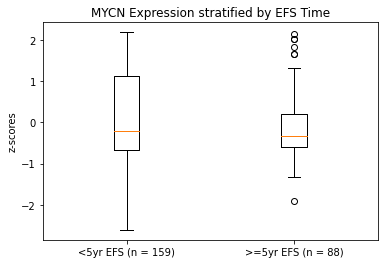

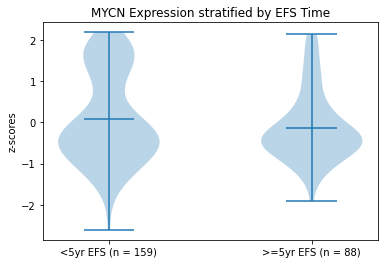

<5yr EFS: median = -0.2135, mean = 0.07860125786163522, 95% CI = (-0.09051680818889105, 0.24771932391216148)
>=5yr EFS: median = -0.32635000000000003, mean = -0.13358522727272729, 95% CI = (-0.30583061334653144, 0.03866015880107687)
Ttest_indResult(statistic=1.5932139763385482, pvalue=0.11240147866963167)


In [9]:
EFS_groups = stratifyNumericalPatientData('EFS Time', 1825) #1825 days = 5yrs
compareExpression('MYCN', EFS_groups,'EFS Time','<5yr EFS','>=5yr EFS')

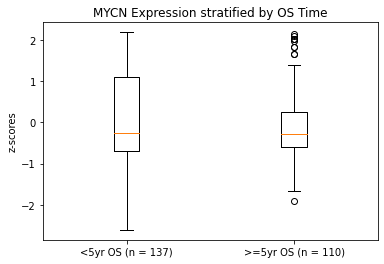

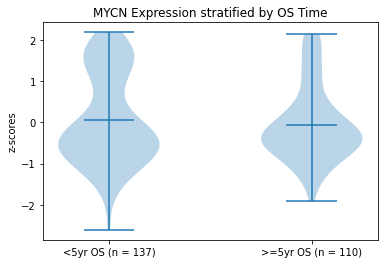

<5yr OS: median = -0.2621, mean = 0.05873357664233576, 95% CI = (-0.1233879731339323, 0.2408551264186038)
>=5yr OS: median = -0.27525, mean = -0.06640363636363635, 95% CI = (-0.2332540827226568, 0.10044680999538409)
Ttest_indResult(statistic=0.9719795758712773, pvalue=0.33201933698114827)


In [11]:
OS_groups = stratifyNumericalPatientData('Overall Survival Days', 1825) #1825 days = 5yrs
compareExpression('MYCN', OS_groups,'OS Time','<5yr OS','>=5yr OS')

Not amplified: median EFS = 1402.0, mean EFS = 1572.4868073878629, 95% CI = (1486.9114767046729, 1658.062138071053)
Amplified: median EFS = 676.0, mean EFS = 1166.6666666666667, 95% CI = (1043.2785122649004, 1290.054821068433)
Ttest_indResult(statistic=5.078409774275892, pvalue=4.4970887544597123e-07)


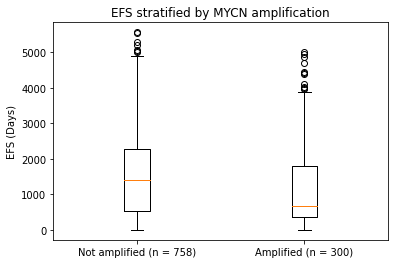

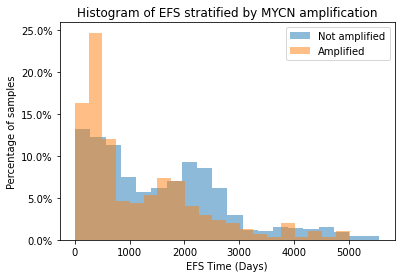

In [4]:
compareEFS(MYCN_groups, 'EFS stratified by MYCN amplification', 'Not amplified', 'Amplified')

In [6]:
MYCN_expression_groups = stratifyDataOnGeneExpression('MYCN',-1,1)

Low expression: median EFS = 505.5, mean EFS = 1090.4666666666667, 95% CI = (670.6722482182114, 1510.2610851151221)
High expression: median EFS = 603.0, mean EFS = 1127.7272727272727, 95% CI = (823.0435601098523, 1432.4109853446932)
Ttest_indResult(statistic=-0.14152268874411766, pvalue=0.8877999771758948)


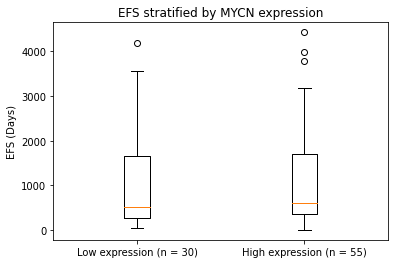

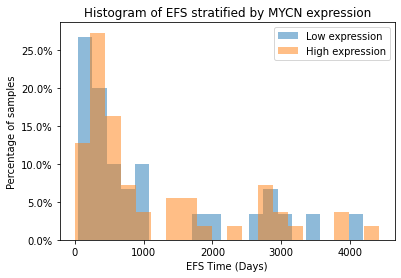

In [7]:
compareEFS(MYCN_expression_groups, 'EFS stratified by MYCN expression', 'Low expression', 'High expression')

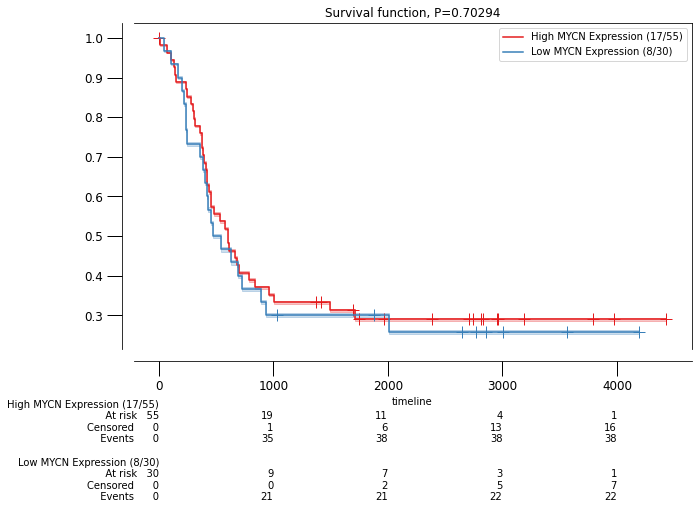

In [8]:
kaplanmeierEFS(MYCN_expression_groups,'Low MYCN Expression', 'High MYCN Expression')

In [25]:
#This function plots a Kaplan Meier curve based on event-free survival of two groups
#Inputs: 2-D array containing lists of samples in two groups (output of functions above), string labels for each group
#Output: Kaplan Meier curve
#This function utilizes the kaplanmeier python package (make sure to cite): https://pypi.org/project/kaplanmeier/
def kaplanmeierEFS_test(groups, label1, label2):
    #Stratify patients based on sample groups
    group1_patients = clinical_sample_trimmed.loc[clinical_sample_trimmed['Sample Identifier'].isin(groups[0])]['#Patient Identifier']
    group2_patients = clinical_sample_trimmed.loc[clinical_sample_trimmed['Sample Identifier'].isin(groups[1])]['#Patient Identifier']
    
    #Get EFS Times (in days) for each group
    group1_EFS = clinical_patient_trimmed.loc[clinical_patient_trimmed['#Patient Identifier'].isin(group1_patients)]['EFS Time'].astype(float)
    group2_EFS = clinical_patient_trimmed.loc[clinical_patient_trimmed['#Patient Identifier'].isin(group2_patients)]['EFS Time'].astype(float)
    
    #Get event status for each group
    group1_event_string = clinical_patient_trimmed.loc[clinical_patient_trimmed['#Patient Identifier'].isin(group1_patients)]['First Event']
    group1_event_num=[]
    for status in group1_event_string:
        if(status == 'Censored'):
            group1_event_num.append(0)
        else:
            group1_event_num.append(1)
    
    group2_event_string = clinical_patient_trimmed.loc[clinical_patient_trimmed['#Patient Identifier'].isin(group2_patients)]['First Event']
    group2_event_num=[]
    for status in group2_event_string:
        if(status == 'Censored'):
            group2_event_num.append(0)
        else:
            group2_event_num.append(1)
    
    #Create dataframe containing EFS Time and Event Status for all group1 samples
    group1_df = pd.DataFrame()
    group1_df['EFS_time'] = group1_EFS.values
    group1_df['Event_Status'] = group1_event_num
    group1_df['Group'] = label1
    
    #Create dataframe containing EFS Time and Event Status for all group2 samples
    group2_df = pd.DataFrame()
    group2_df['EFS_time'] = group2_EFS.values
    group2_df['Event_Status'] = group2_event_num
    group2_df['Group'] = label2
    
    #Combine dataframes
    combined_df = pd.concat([group1_df,group2_df]).dropna()
    
    #Use kaplanmeier Python package to plot Kaplan-Meier survival curve
    out = km.fit(combined_df['EFS_time'], combined_df['Event_Status'], combined_df['Group'])
    km.plot(out)

In [23]:
#Find z-scores for MYCN amplified samples
amplified_MYCN_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(MYCN_groups[1]).intersection(z_scores.columns))
amplified_MYCN_z_scores = z_scores[amplified_MYCN_columns]

#Obtain the ACE2 z-scores in amplified MYCN samples
ACE2_MYCN_amplified_z_scores = amplified_MYCN_z_scores.loc[amplified_MYCN_z_scores['Hugo_Symbol']=='ACE2'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_ACE2_MYCN_amplified_samples = ACE2_MYCN_amplified_z_scores.loc[ACE2_MYCN_amplified_z_scores.iloc[:,0] < -0.5].index
#Find samples for which the z-scores are > 0.5
high_ACE2_MYCN_amplified_samples = ACE2_MYCN_amplified_z_scores.loc[ACE2_MYCN_amplified_z_scores.iloc[:,0] > 0.5].index

#Find z-scores for MYCN nonamplified samples
nonamplified_MYCN_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(MYCN_groups[0]).intersection(z_scores.columns))
nonamplified_MYCN_z_scores = z_scores[nonamplified_MYCN_columns]

#Obtain the ACE2 z-scores in nonamplified MYCN samples
ACE2_MYCN_nonamplified_z_scores = nonamplified_MYCN_z_scores.loc[nonamplified_MYCN_z_scores['Hugo_Symbol']=='ACE2'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_ACE2_MYCN_nonamplified_samples = ACE2_MYCN_nonamplified_z_scores.loc[ACE2_MYCN_nonamplified_z_scores.iloc[:,0] < -0.5].index
#Find samples for which the z-scores are > 0.5
high_ACE2_MYCN_nonamplified_samples = ACE2_MYCN_nonamplified_z_scores.loc[ACE2_MYCN_nonamplified_z_scores.iloc[:,0] > 0.5].index



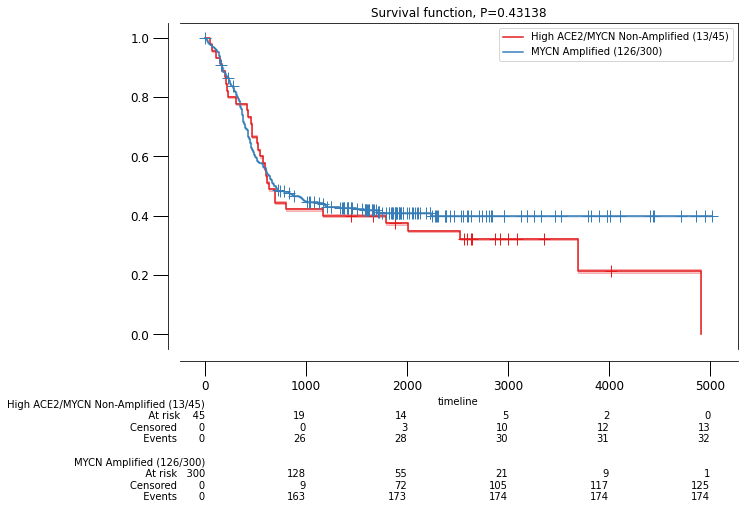

In [26]:
kaplanmeierEFS_test([MYCN_groups[1],high_ACE2_MYCN_nonamplified_samples], 'MYCN Amplified', 'High ACE2/MYCN Non-Amplified')


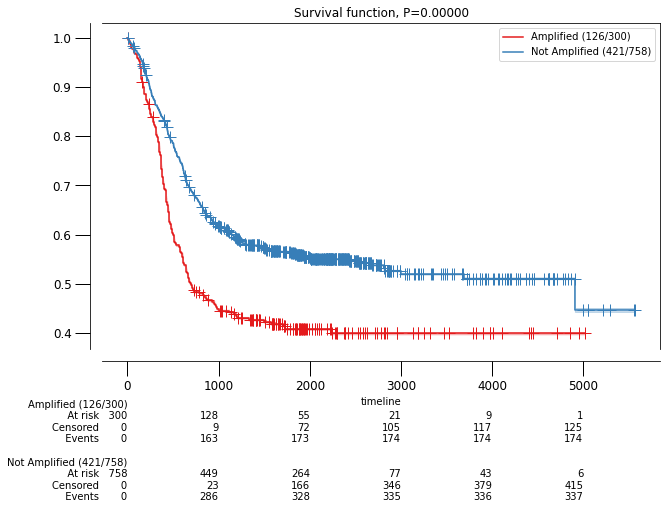

In [28]:
kaplanmeierEFS_test(MYCN_groups, 'Not Amplified', 'Amplified')